In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 

In [3]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2))) # 2x2 max pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # 64 3x3 filters
model.add(layers.MaxPooling2D((2, 2))) # 2x2 max pooling
model.add(layers.Flatten()) # Flatten the 2D arrays for fully connected layers
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax')) # 10 output nodes

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [5]:
custom_optimizer = Adam(learning_rate=0.0001) # Define a custom optimizer
model.compile(optimizer=custom_optimizer, # Use the custom optimizer
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4177 - accuracy: 0.8872 - val_loss: 0.1307 - val_accuracy: 0.9626
Epoch 2/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.1200 - accuracy: 0.9647 - val_loss: 0.0846 - val_accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0861 - accuracy: 0.9738 - val_loss: 0.0657 - val_accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0696 - accuracy: 0.9786 - val_loss: 0.0562 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0497 - val_accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0448 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0384 -

In [7]:
# early stopping

tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [9]:
history =  model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test), callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0337 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0267 - accuracy: 0.9919 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0318 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0295 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0316 - val_accuracy: 0.9901
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0299 -

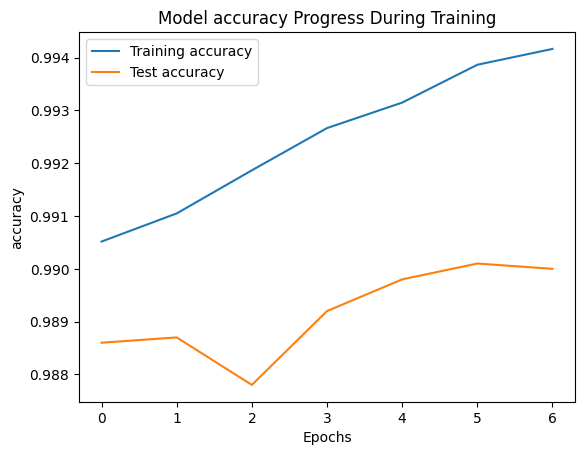

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()

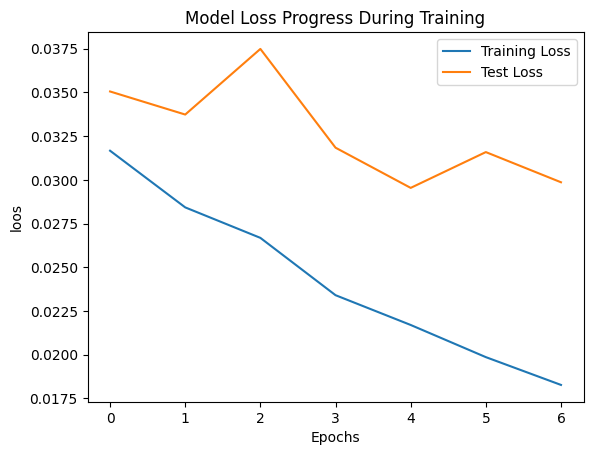

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('loos')
plt.legend(['Training Loss', 'Test Loss'])
plt.show()